# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
import tensorflow as tf
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
x_Train_normalize = tf.convert_to_tensor(x_Train_normalize)
x_Test_normalize = tf.convert_to_tensor(x_Test_normalize)

In [5]:
x_Train_normalize

<tf.Tensor: id=0, shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [7]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = tf.keras.backend.one_hot(y_train_label,10)
y_Test_OneHot = tf.keras.backend.one_hot(y_test_label,10)

In [8]:
y_Train_OneHot.shape

TensorShape([60000, 10])

# 建立模型

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization

In [ ]:
#建立模型

In [19]:
model = Sequential()

In [20]:
model.add(BatchNormalization())
model.add(Dense(units = 512, kernel_initializer = 'normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 64, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 訓練模型

In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [22]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 116us/sample - loss: 0.2574 - accuracy: 0.9239 - val_loss: 0.1167 - val_accuracy: 0.9650
Epoch 2/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.1104 - accuracy: 0.9657 - val_loss: 0.0979 - val_accuracy: 0.9708
Epoch 3/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.0842 - accuracy: 0.9737 - val_loss: 0.1039 - val_accuracy: 0.9722
Epoch 4/10
48000/48000 [==============================] - 5s 102us/sample - loss: 0.0662 - accuracy: 0.9783 - val_loss: 0.0895 - val_accuracy: 0.9747
Epoch 5/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.0601 - accuracy: 0.9808 - val_loss: 0.0951 - val_accuracy: 0.9746
Epoch 6/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.0482 - accuracy: 0.9842 - val_loss: 0.0895 - val_accuracy: 0.9748
Epoch 7/10
48000/48000 [==========================

# 以圖形顯示訓練過程

In [23]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

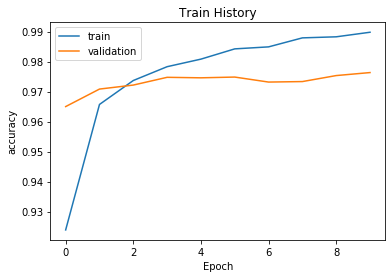

In [26]:
show_train_history(train_history,'accuracy','val_accuracy')

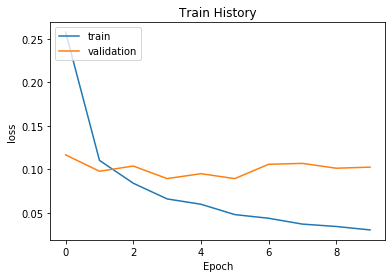

In [27]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [28]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


accuracy= 0.979
